In [ ]:
y_actual=['A','B','A','A','A','A','A','B','B','B','B','A','B','C','A','C','A','B','B','B','A','C','C','C','A','B','A','C','C','B','C','B','A','C','B','A']
y_pred=  ['B','A','A','B','A','C','A','B','B','B','B','B','A','C','A','B','A','B','A','B','B','B','A','C','C','C','A','C','C','B','C','A','A','C','B','A']

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_actual)

0.6111111111111112

FOR APPLYING ROC AUC WE NEED PREDICTION SCORES, WE WILL NEED TO BUILD A DATA SET

LETS BUILD A DUMMY DATASET : BALANCED BINARY CLAS



In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
x,y=make_classification(n_samples=100,n_classes=2,n_redundant=0,n_features=7,n_informative=7,weights=[0.5,0.5])

In [ ]:
import pandas as pd
X=pd.DataFrame(x,columns=['A','B','C','D','E','F','G'])
Y=pd.Series(y)
X['class']=Y
X.head(7)

,A,B,C,D,E,F,G,class
0,0.534548,2.973820,1.501710,-0.329563,-0.007307,-1.867776,-2.053919,0
1,-1.702986,-3.500198,3.725530,1.659079,-0.548188,3.607375,-3.466465,0
2,1.330025,1.012986,-1.866128,1.877699,-1.004556,-0.802662,-0.225374,1
3,1.950352,-0.341249,0.887813,-1.412630,-0.186251,-1.308640,1.050619,0
4,1.785164,0.027428,2.768064,2.585345,2.880352,-0.193401,1.919741,1
5,-1.844765,1.287153,0.288623,-0.978644,-1.575506,0.458874,-2.673769,0
6,-0.160397,2.065545,-1.999753,1.016745,-1.189967,-0.364996,-0.470507,1


In [ ]:
lr=LogisticRegression()
lr.fit(x,y)
Y_pred=lr.predict(x)# this predicts classes once the data is fit.
Y_pred[:5]

array([0, 0, 1, 0, 1])

In [ ]:
accuracy_score(Y_pred,y)

0.82

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,lr.predict_proba(x)[:,1])# this gives AUC score 

0.9004

AUC MEANS WITH ESTIMAITION OF MORE FALSE ON A CLASS THE CHANCES OF PREDICTING IT RIGHT WILL ALSO BE MORE. COMPARING THE RATES OF FALSE OVER A CLASS AND PREDICTING THEM RIGHT IS AUC

FPR--> FP/TOTAL NEGATIVES  [MORE FALSE POSITIVE ESTIMATED, THEN MODEL MIGHT BE MOSTLY PREDICTING MOST OF THE CLASS AS POSITIVE]

TPR--> TP/TOTAL POSITIVES  [MORE TRUE POSITIVES COMING OUT BECAUSE OF PREDICTING MOST OF THEM AS POSITIVE]

COMPARE THE RATES, IF FOR SMALL FPR YOU HAVE HIGH TPR, THEN IT IS GOOD
FOR HIGH FPR, YOU GO WITH HIGH TPR, THEN IT SAYS YOU NEED TO GAIN MORE FALSE PREDICTION OVER CLASS + TO GET MORE TRUE +




In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,lr.predict(x))

array([[39, 11],
       [ 7, 43]])

In [ ]:
#alternate way if finding accuracy score 
import numpy as np
acc_score= np.trace(confusion_matrix(y,lr.predict(x)))/np.sum(confusion_matrix(y,lr.predict(x)))
acc_score

0.82

In [ ]:
#lets build roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fpr,tpr,_=roc_curve(y,lr.predict_proba(x)[:,1])
auc(fpr,tpr)

0.9004

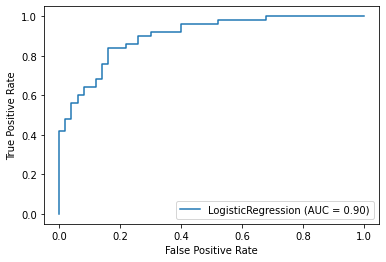

In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

plot_roc_curve(lr,x,y)
plt.show()

PRECISION- RECALL: ANOTHER IMAGINATION WHERE THE FLUCTUATION OF TRUE PREDICTION OF A CLASS IS MUCH CONCERNED

TWO WAYS THAT CAN DESTROY YOUR TRUE PPREDICTIONS IS 
A)FALSELY PREDICTING IT(FP)
B)FALSELY PREDICTING ANOTHER CLASS(FN)

PRECISION-->TP/FP+TP  
[IF THIS GIVES 0.7, IT SAYS OUT OF TOTAL +VES PREDICTING 70% ARE REALLY +VE]

RECALL(TPR)-->TP/ACTUAL POSTIVES

THESE BOTH ACTUALLY DONT CORRELATE AS THRESHOLDS CHANGING ONE MIGHT NOT AFFECT ANOTHER

IF MORE FP AND FN THEN PRECISION RECALL IS AFFECTED.

IF MORE FP BUT FN IS CONTROLLED THEN MODEL MIGHT HAVE GOOD TPR BUT POOR PRECISION. BASED ON THE DOMAIN KNOWLEDGE IT IS IMPORTANT HOW TO BALANCE THESE PRECISON AND RECALL.

In [ ]:
from sklearn.metrics import precision_score
precision_score(y,lr.predict(x))

0.7962962962962963

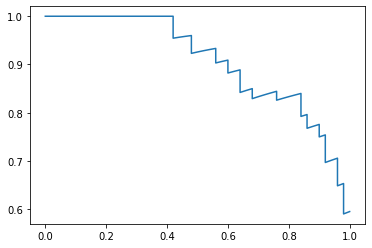

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

pr,re,_=precision_recall_curve(y,lr.predict_proba(x)[:,1])
plt.plot(re,pr)
plt.show()

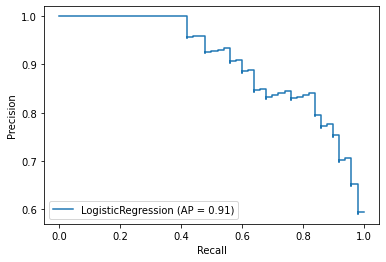

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lr,x,y)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
pre,re,f_scre,_=precision_recall_fscore_support(y,lr.predict(x))
f_scre

array([0.8125    , 0.82692308])

BUILD DUMMY DATASET -BINARY CLASS , IMBALANCED DATA SET 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
x,y=make_classification(n_samples=100,n_classes=2,n_redundant=0,n_features=7,n_informative=7,weights=[0.8,0.2])

In [ ]:
import pandas as pd
X=pd.DataFrame(x,columns=['A','B','C','D','E','F','G'])
Y=pd.Series(y)
X['class']=Y
X.head(7)

,A,B,C,D,E,F,G,class
0,-2.212792,-0.656788,1.380524,0.819959,-1.088160,-1.163996,-0.190359,0
1,-1.104748,2.312091,-1.627159,1.736435,-0.684931,0.896311,-1.326348,0
2,0.253617,1.697888,-0.993406,1.278268,-1.780797,-4.374266,-2.226039,0
3,-1.317048,2.718450,0.438993,-0.287651,2.804176,-2.124541,0.480884,0
4,-2.073580,0.310425,-0.891254,0.105221,-1.040281,-0.559234,0.704404,0
5,0.085300,-0.756486,1.898870,5.088403,3.551182,-0.288488,-4.333782,1
6,-0.456271,-0.276044,-0.030642,-0.956738,0.933426,-0.402116,-0.262022,1


In [ ]:
lr=LogisticRegression()
lr.fit(x,y)
Y_pred=lr.predict(x)# this predicts classes once the data is fit.
Y_pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,y)

0.98

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,lr.predict_proba(x)[:,1])# this gives AUC score 

0.99875

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,lr.predict(x))

array([[80,  0],
       [ 2, 18]])

In [ ]:
#alternate way if finding accuracy score 
import numpy as np
acc_score= np.trace(confusion_matrix(y,lr.predict(x)))/np.sum(confusion_matrix(y,lr.predict(x)))
acc_score

0.98

In [ ]:
#lets build roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fpr,tpr,_=roc_curve(y,lr.predict_proba(x)[:,1])
auc(fpr,tpr)

0.99875

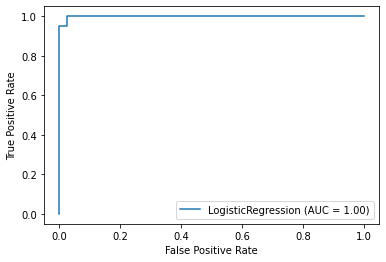

In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

plot_roc_curve(lr,x,y)
plt.show()

In [ ]:
from sklearn.metrics import precision_score
precision_score(y,lr.predict(x))# this gives precision score for class 1, please check below for the precision scores for both classes

1.0

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
pr,re,_,_=precision_recall_fscore_support(y,lr.predict(x))
pr

array([0.97560976, 1.        ])

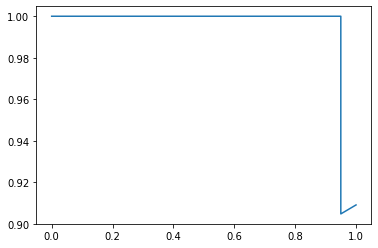

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

pr,re,_,=precision_recall_curve(y,lr.predict_proba(x)[:,1])
plt.plot(re,pr)
plt.show()

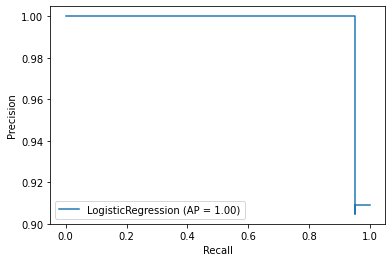

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lr,x,y)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
pre,re,f_scre,_=precision_recall_fscore_support(y,lr.predict(x))
f_scre

array([0.98765432, 0.94736842])

In [ ]:
#LETS CHANGE BETA VALUE 
from sklearn.metrics import precision_recall_fscore_support
pre,re,f_scre,_=precision_recall_fscore_support(y,lr.predict(x),beta=0.7)# beta reduced from 1 
f_scre

array([0.98349835, 0.9647482 ])

MULTI CLASS 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
x,y=make_classification(n_samples=100,n_classes=4,n_redundant=0,n_features=7,n_informative=7)




In [ ]:
import pandas as pd
X=pd.DataFrame(x,columns=['A','B','C','D','E','F','G'])
Y=pd.Series(y)
X['class']=Y
X.head(7)

,A,B,C,D,E,F,G,class
0,-1.752998,-1.358489,-1.077392,1.068007,1.021803,-0.840994,1.529346,0
1,-2.469372,-0.776923,-2.152701,1.902782,-3.003411,-3.173950,0.977852,1
2,1.007184,-0.252084,-0.005808,-0.421460,0.234670,-1.039469,1.719022,1
3,-1.789168,0.335794,-1.763506,-0.262744,1.106673,0.725719,0.381217,3
4,1.388863,0.136914,-0.384120,-1.124022,-1.591378,2.053674,-3.654311,2
5,1.491908,2.233655,0.076185,-0.808637,4.360833,2.481834,-1.660581,3
6,0.430525,-0.275941,0.318983,1.665928,-1.425101,0.052679,1.217509,2


In [ ]:
lr=LogisticRegression(multi_class='ovr')
lr.fit(x,y)
Y_pred=lr.predict(x)# this predicts classes once the data is fit.
Y_pred[:5]

array([2, 1, 1, 2, 3])

In [ ]:
accuracy_score(Y_pred,y)

0.66

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,lr.predict_proba(x),multi_class='ovr')

0.8493253337345442

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,lr.predict(x))# our auc score was very good being there were more trues then falses

array([[20,  0,  4,  1],
       [ 1, 18,  3,  3],
       [ 5,  2, 10,  7],
       [ 2,  4,  2, 18]])

In [ ]:
#alternate way if finding accuracy score 
import numpy as np
acc_score= np.trace(confusion_matrix(y,lr.predict(x)))/np.sum(confusion_matrix(y,lr.predict(x)))
acc_score

0.66

In [ ]:
#this will contain the auc scores with respective to the class
ac={}

In [ ]:
#lets build roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# keep changing the classes from 0-3 so that you can see the auc with respective class
fpr,tpr,th=roc_curve(y,lr.predict_proba(x)[:,3],pos_label=3) 
ac[3]=auc(fpr,tpr)


In [ ]:
ac# with respective to class 0 , we get more AUC score

{0: 0.9386666666666666,
 1: 0.8309333333333334,
 2: 0.7269736842105263,
 3: 0.9007276507276507}

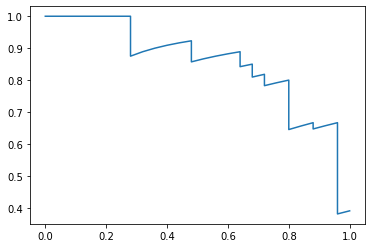

In [ ]:
# LETS TAKE PRECISION RECALL AREA AS WELL
pr,re,_=precision_recall_curve(y,lr.predict_proba(x)[:,0],pos_label=0)
plt.plot(re,pr)
plt.show()

In [ ]:
#area under curve
import numpy as np
np.trapz(pr,re)

-0.09406511138589183

In [ ]:
pr,re,fscres,betas=precision_recall_fscore_support(y,lr.predict(x))# this gives the f scores with threshold being 0.5 taking each class at a time 
fscres

array([0.75471698, 0.73469388, 0.46511628, 0.65454545])